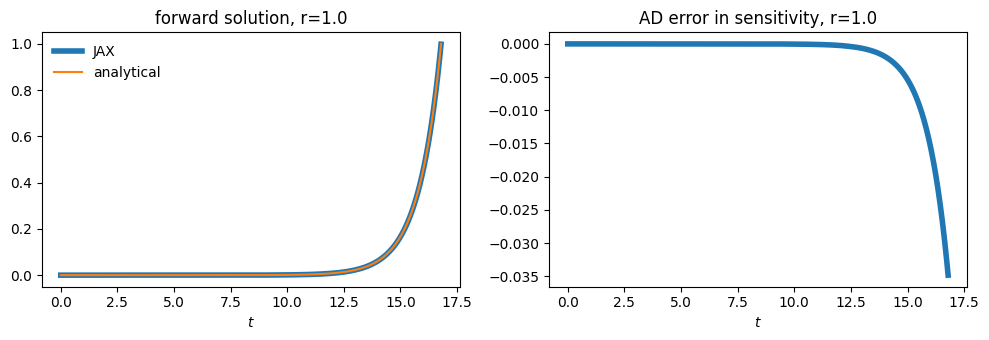

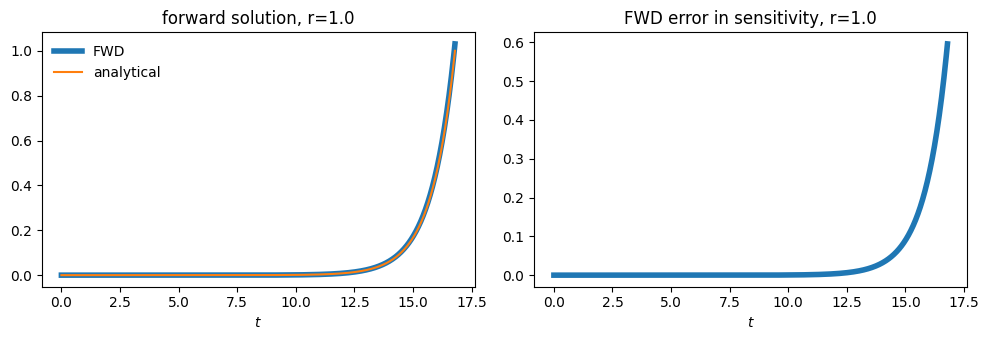

In [1]:
import numpy as np
import jax.numpy as jnp
import diffrax
import jax
from jax import grad, jacrev
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import cm
from time import time
jax.config.update("jax_enable_x64", True)
plt.rcParams.update({'font.size':10})
import gc

r = 1.0
x0 = 1./19617869
tSpan = jnp.linspace(0,1.0/np.abs(r)*np.log(1./x0),1001)
tol=1e-8
gc.collect()

@jax.jit
def RHS(t,x,r):  
    return r*x

@jax.jit
def xt(r):
    terms = diffrax.ODETerm(RHS)
    solver = diffrax.Dopri8()
    t0 = tSpan[0]
    t1 = tSpan[-1]
    dt0 = None
    IC = x0
    saveat = diffrax.SaveAt(ts=tSpan)
    stepsize_controller = diffrax.PIDController(rtol=tol, atol=tol)    
    sol = diffrax.diffeqsolve(terms,solver,t0,t1,dt0,IC,args=(r),saveat=saveat,stepsize_controller=stepsize_controller,max_steps=int(1e12))
    return sol.ys  

sensAD = jacrev(xt)(r)
sol = xt(r)

fig, ax = plt.subplots(1,2,figsize=(10,3.5))
ax[0].plot(tSpan, sol, lw=4, zorder = 1, label='JAX')
ax[0].plot(tSpan, x0*np.exp(r*tSpan), zorder=3, label='analytical')
ax[0].legend(loc=2,frameon=False)
ax[0].set_xlabel('$t$')
ax[0].set_title(f'forward solution, r={r}')
ax[1].plot(tSpan, sensAD-x0*tSpan*np.exp(r*tSpan),lw=4, zorder=111)
ax[1].set_xlabel('$t$')
ax[1].set_title(f'AD error in sensitivity, r={r}')
plt.tight_layout()

import numpy as np
from scipy.integrate import solve_ivp
from numba import njit
par = r
x = x0
IC = state = x

stateDim, parDim = 1, 1

@njit
def F(t,state,par):  
    x = state
    r = par
    return r*x
        
@njit
def J(t,state,par):
    x = state
    r = par
    return r
    
@njit
def dFdtheta_constant(t,state,par):
    x = state
    r = par
    return x
    
def jointF(t,jointState,par):
    x = jointState[:stateDim]
    s = jointState[stateDim:].reshape((stateDim,parDim))
    dx = F(t,x,par)
    ds = (J(t,x,par)*s+ dFdtheta_constant(t,x,par)).reshape((stateDim*parDim,))
    return np.hstack((dx,ds))
    
jointState = np.zeros(stateDim*(parDim+1))
jointState[:stateDim] = np.array([x0])

sol_buffer = solve_ivp(fun=lambda t,z: jointF(t,z,par), t_span=(tSpan[0],tSpan[-1]),y0=jointState, t_eval=tSpan, method='LSODA', rtol=tol,atol=tol)
sensFWD = sol_buffer.y[1,:]
solFWD = sol_buffer.y[0,:]

fig, ax = plt.subplots(1,2,figsize=(10,3.5))
ax[0].plot(tSpan, solFWD, lw=4, zorder = 1, label='FWD')
ax[0].plot(tSpan, x0*np.exp(r*tSpan), zorder=3, label='analytical')
ax[0].legend(loc=2,frameon=False)
ax[0].set_xlabel('$t$')
ax[0].set_title(f'forward solution, r={r}')
ax[1].plot(tSpan, sensFWD-x0*tSpan*np.exp(r*tSpan),lw=4, zorder=111)
ax[1].set_xlabel('$t$')
ax[1].set_title(f'FWD error in sensitivity, r={r}')
plt.tight_layout()

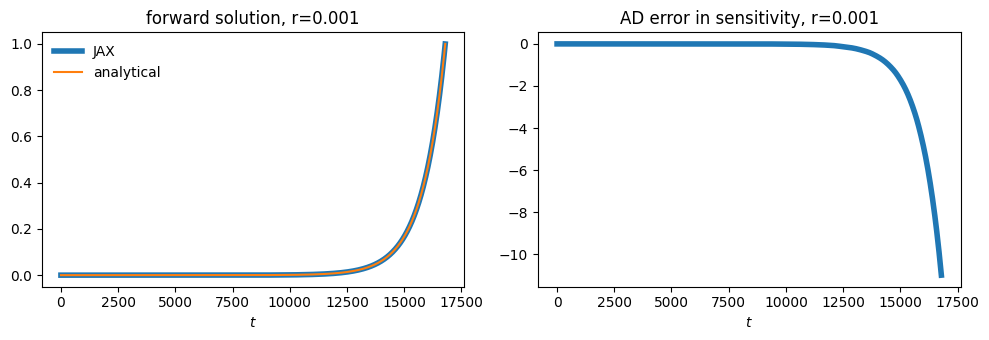

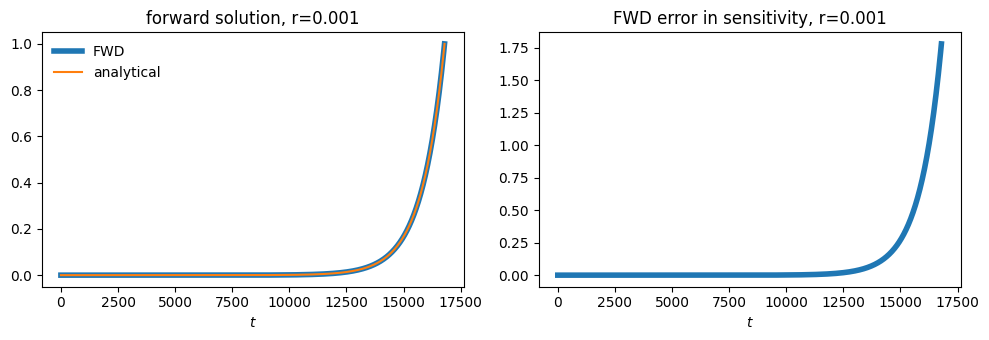

In [2]:
import numpy as np
import jax.numpy as jnp
import diffrax
import jax
from jax import grad, jacrev
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import cm
from time import time
jax.config.update("jax_enable_x64", True)
plt.rcParams.update({'font.size':10})
import gc

r = 0.001
x0 = 1./19617869
tSpan = jnp.linspace(0,1.0/np.abs(r)*np.log(1./x0),1001)
tol=1e-8
gc.collect()

@jax.jit
def RHS(t,x,r):  
    return r*x

@jax.jit
def xt(r):
    terms = diffrax.ODETerm(RHS)
    solver = diffrax.Dopri8()
    t0 = tSpan[0]
    t1 = tSpan[-1]
    dt0 = None
    IC = x0
    saveat = diffrax.SaveAt(ts=tSpan)
    stepsize_controller = diffrax.PIDController(rtol=tol, atol=tol)    
    sol = diffrax.diffeqsolve(terms,solver,t0,t1,dt0,IC,args=(r),saveat=saveat,stepsize_controller=stepsize_controller,max_steps=int(1e12))
    return sol.ys  

sensAD = jacrev(xt)(r)
sol = xt(r)

fig, ax = plt.subplots(1,2,figsize=(10,3.5))
ax[0].plot(tSpan, sol, lw=4, zorder = 1, label='JAX')
ax[0].plot(tSpan, x0*np.exp(r*tSpan), zorder=3, label='analytical')
ax[0].legend(loc=2,frameon=False)
ax[0].set_xlabel('$t$')
ax[0].set_title(f'forward solution, r={r}')
ax[1].plot(tSpan, sensAD-x0*tSpan*np.exp(r*tSpan),lw=4, zorder=111)
ax[1].set_xlabel('$t$')
ax[1].set_title(f'AD error in sensitivity, r={r}')
plt.tight_layout()

import numpy as np
from scipy.integrate import solve_ivp
from numba import njit
par = r
x = x0
IC = state = x

stateDim, parDim = 1, 1

@njit
def F(t,state,par):  
    x = state
    r = par
    return r*x
        
@njit
def J(t,state,par):
    x = state
    r = par
    return r
    
@njit
def dFdtheta_constant(t,state,par):
    x = state
    r = par
    return x
    
def jointF(t,jointState,par):
    x = jointState[:stateDim]
    s = jointState[stateDim:].reshape((stateDim,parDim))
    dx = F(t,x,par)
    ds = (J(t,x,par)*s+ dFdtheta_constant(t,x,par)).reshape((stateDim*parDim,))
    return np.hstack((dx,ds))
    
jointState = np.zeros(stateDim*(parDim+1))
jointState[:stateDim] = np.array([x0])

sol_buffer = solve_ivp(fun=lambda t,z: jointF(t,z,par), t_span=(tSpan[0],tSpan[-1]),y0=jointState, t_eval=tSpan, method='LSODA', rtol=tol,atol=tol)
sensFWD = sol_buffer.y[1,:]
solFWD = sol_buffer.y[0,:]

fig, ax = plt.subplots(1,2,figsize=(10,3.5))
ax[0].plot(tSpan, solFWD, lw=4, zorder = 1, label='FWD')
ax[0].plot(tSpan, x0*np.exp(r*tSpan), zorder=3, label='analytical')
ax[0].legend(loc=2,frameon=False)
ax[0].set_xlabel('$t$')
ax[0].set_title(f'forward solution, r={r}')
ax[1].plot(tSpan, sensFWD-x0*tSpan*np.exp(r*tSpan),lw=4, zorder=111)
ax[1].set_xlabel('$t$')
ax[1].set_title(f'FWD error in sensitivity, r={r}')
plt.tight_layout()

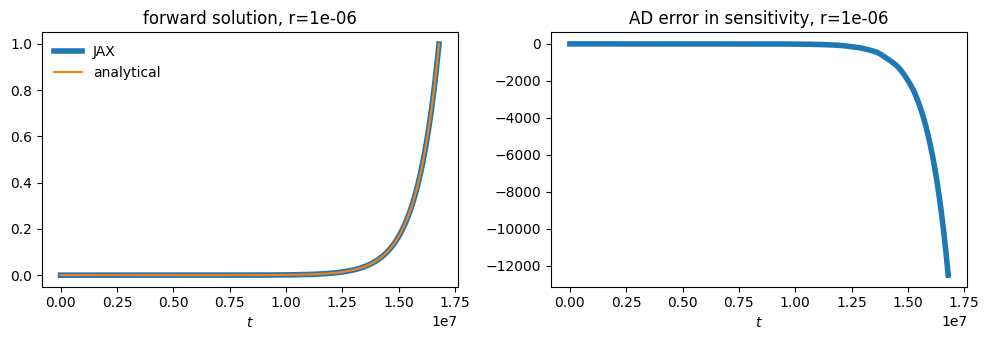

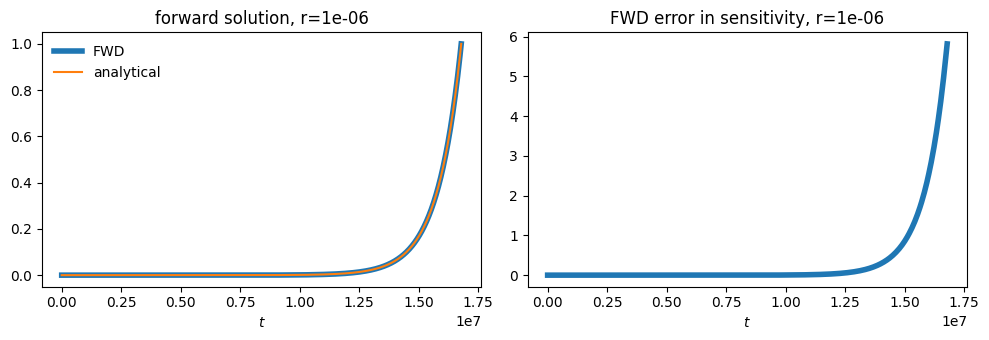

In [3]:
import numpy as np
import jax.numpy as jnp
import diffrax
import jax
from jax import grad, jacrev
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import cm
from time import time
jax.config.update("jax_enable_x64", True)
plt.rcParams.update({'font.size':10})
import gc

r = 1e-6
x0 = 1./19617869
tSpan = jnp.linspace(0,1.0/np.abs(r)*np.log(1./x0),1001)
tol=1e-8
gc.collect()

@jax.jit
def RHS(t,x,r):  
    return r*x

@jax.jit
def xt(r):
    terms = diffrax.ODETerm(RHS)
    solver = diffrax.Dopri8()
    t0 = tSpan[0]
    t1 = tSpan[-1]
    dt0 = None
    IC = x0
    saveat = diffrax.SaveAt(ts=tSpan)
    stepsize_controller = diffrax.PIDController(rtol=tol, atol=tol)    
    sol = diffrax.diffeqsolve(terms,solver,t0,t1,dt0,IC,args=(r),saveat=saveat,stepsize_controller=stepsize_controller,max_steps=int(1e12))
    return sol.ys  

sensAD = jacrev(xt)(r)
sol = xt(r)

fig, ax = plt.subplots(1,2,figsize=(10,3.5))
ax[0].plot(tSpan, sol, lw=4, zorder = 1, label='JAX')
ax[0].plot(tSpan, x0*np.exp(r*tSpan), zorder=3, label='analytical')
ax[0].legend(loc=2,frameon=False)
ax[0].set_xlabel('$t$')
ax[0].set_title(f'forward solution, r={r}')
ax[1].plot(tSpan, sensAD-x0*tSpan*np.exp(r*tSpan),lw=4, zorder=111)
ax[1].set_xlabel('$t$')
ax[1].set_title(f'AD error in sensitivity, r={r}')
plt.tight_layout()

import numpy as np
from scipy.integrate import solve_ivp
from numba import njit
par = r
x = x0
IC = state = x

stateDim, parDim = 1, 1

@njit
def F(t,state,par):  
    x = state
    r = par
    return r*x
        
@njit
def J(t,state,par):
    x = state
    r = par
    return r
    
@njit
def dFdtheta_constant(t,state,par):
    x = state
    r = par
    return x
    
def jointF(t,jointState,par):
    x = jointState[:stateDim]
    s = jointState[stateDim:].reshape((stateDim,parDim))
    dx = F(t,x,par)
    ds = (J(t,x,par)*s+ dFdtheta_constant(t,x,par)).reshape((stateDim*parDim,))
    return np.hstack((dx,ds))
    
jointState = np.zeros(stateDim*(parDim+1))
jointState[:stateDim] = np.array([x0])

sol_buffer = solve_ivp(fun=lambda t,z: jointF(t,z,par), t_span=(tSpan[0],tSpan[-1]),y0=jointState, t_eval=tSpan, method='LSODA', rtol=tol,atol=tol)
sensFWD = sol_buffer.y[1,:]
solFWD = sol_buffer.y[0,:]

fig, ax = plt.subplots(1,2,figsize=(10,3.5))
ax[0].plot(tSpan, solFWD, lw=4, zorder = 1, label='FWD')
ax[0].plot(tSpan, x0*np.exp(r*tSpan), zorder=3, label='analytical')
ax[0].legend(loc=2,frameon=False)
ax[0].set_xlabel('$t$')
ax[0].set_title(f'forward solution, r={r}')
ax[1].plot(tSpan, sensFWD-x0*tSpan*np.exp(r*tSpan),lw=4, zorder=111)
ax[1].set_xlabel('$t$')
ax[1].set_title(f'FWD error in sensitivity, r={r}')
plt.tight_layout()